# Simulation of Common Data Platform
## Bronze Analysis - Conversation Tracking example
## THKA, SET, August 2021

In [1]:
# Import needed libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import logsim.datapool as cdp
pd.options.mode.chained_assignment = None

## App data

In [2]:
# Reload data
bronze = cdp.CDP()
bronze.loadAsCSV(ver='03')
df = bronze.getAppDaily().df
print('Shape of BRONZE App Daily data frame is ' + str(df.shape))

No file: fsw_monthly_03.csv
Shape of BRONZE App Daily data frame is (7420, 18)


In [3]:
print('Head of BRONZE App Daily data frame')
df[df['id'] == 1].head()

Head of BRONZE App Daily data frame


,id,power_cycle,charge,usage,ovd,speech,noise,snr-low,snr-med,snr-high,ovd-snr-low,ovd-snr-med,ovd-snr-high,vcUp,vcDwn,time,date,usage-at-time
1,1,0,28360,29534,2040,5760,4200,2940,5880,20160,540,1620,1620,4,4,2020-03-02 08:00:00,2020-03-02,440
23,1,1,86129,57870,3840,11520,8220,5760,11520,40320,960,2880,2880,8,8,2020-03-03 09:00:00,2020-03-03,32671
41,1,2,145905,84358,5520,16560,12000,8400,16800,58800,1380,4140,4140,12,11,2020-03-04 09:00:00,2020-03-04,59295
60,1,3,201384,115438,7560,22680,16440,11460,22920,80220,1860,5580,5580,16,15,2020-03-05 08:00:00,2020-03-05,86616
80,1,4,258070,145353,9720,28800,20700,14520,29040,101220,2460,7380,7380,20,19,2020-03-06 08:00:00,2020-03-06,116330


In [4]:
# Check for duplicates
df[df.duplicated(['id', 'power_cycle'])].size

0

In [5]:
# Check for NaN
df.isnull().any()

id               False
power_cycle      False
charge           False
usage            False
ovd              False
speech           False
noise            False
snr-low          False
snr-med          False
snr-high         False
ovd-snr-low      False
ovd-snr-med      False
ovd-snr-high     False
vcUp             False
vcDwn            False
time             False
date             False
usage-at-time    False
dtype: bool

<AxesSubplot:xlabel='date'>

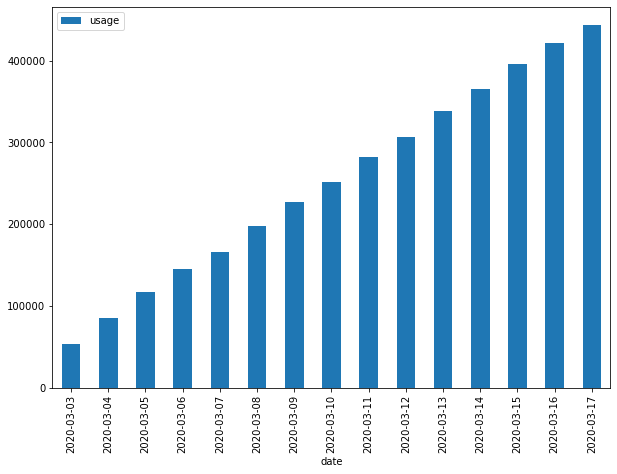

In [6]:
# Analyze data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
df[df['id'] == 0].iloc[1:16].plot.bar(x='date', y='usage')

In [7]:
# Differentiate data, Step 1: Which columns to differentiate
df.keys()
k_list = [x for x in list(df.keys()) if x not in ['id', 'power_cycle', 'time',
       'date', 'usage-at-time']]
k_list

['charge',
 'usage',
 'ovd',
 'speech',
 'noise',
 'snr-low',
 'snr-med',
 'snr-high',
 'ovd-snr-low',
 'ovd-snr-med',
 'ovd-snr-high',
 'vcUp',
 'vcDwn']

In [8]:
# Differentiate data, Step 2: Get list of ID's
id_list = list(df['id'].unique())
id_list

[12, 1, 2, 7, 9, 0, 3, 4, 5, 6, 13, 8, 10, 14, 17, 11, 16, 18, 15, 19]

In [9]:
# Differentiate data, Step 3: Diff the relevant data
dd = df.copy()
dd.drop(dd.loc[df['power_cycle']==0].index, inplace=True)

# Loop over all ID's
for id in id_list:
    dd.loc[df['id'] == id, k_list] = df.loc[df['id'] == id, k_list].diff().iloc[1:].astype(int)

# Take a look
dd[dd['id'] == 0]

,id,power_cycle,charge,usage,ovd,speech,noise,snr-low,snr-med,snr-high,ovd-snr-low,ovd-snr-med,ovd-snr-high,vcUp,vcDwn,time,date,usage-at-time
20,0,1,64305,22289,1440,4320,3180,2220,4440,15960,360,1080,1080,3,3,2020-03-03 10:00:00,2020-03-03,31973
40,0,2,55641,31040,2160,6120,4380,3120,6240,21420,540,1620,1620,4,4,2020-03-04 08:00:00,2020-03-04,55532
63,0,3,54370,31895,2040,6480,4620,3240,6360,22680,540,1440,1440,4,4,2020-03-05 08:00:00,2020-03-05,87562
85,0,4,57849,28329,1920,5760,4020,2820,5760,20160,420,1440,1440,4,3,2020-03-06 09:00:00,2020-03-06,119713
100,0,5,64669,21619,1440,4320,3060,2160,4320,14700,360,1080,1080,3,3,2020-03-07 10:00:00,2020-03-07,145044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,0,366,61012,25147,4760,7126,3600,3024,4920,17136,1470,1260,2597,3,3,2021-03-03 09:00:00,2021-03-03,9912698
7342,0,367,64025,22613,4080,6108,3240,2736,4680,15504,1260,1080,2226,3,3,2021-03-04 10:00:00,2021-03-04,9938673
7367,0,368,55290,31039,5780,8653,4440,3744,6240,21216,1680,1440,2968,4,4,2021-03-05 08:00:00,2021-03-05,9962583
7383,0,369,64203,22375,4080,6108,3180,2664,4440,15504,1260,1080,2226,3,3,2021-03-06 10:00:00,2021-03-06,9991980


<AxesSubplot:xlabel='date'>

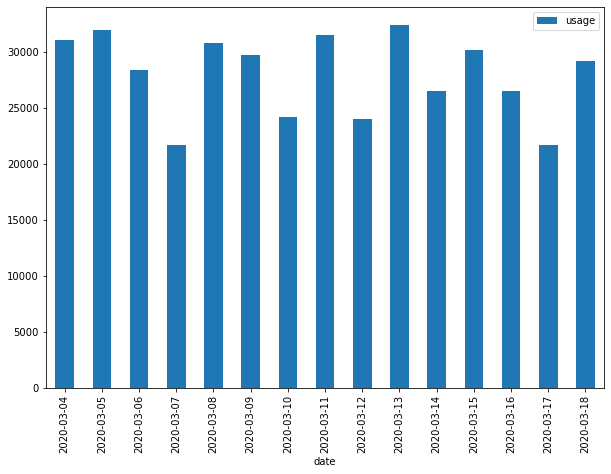

In [10]:
# Plot usage data
dd[dd['id'] == 0].iloc[1:16].plot.bar(x='date', y='usage')

In [11]:
# Beautify plots by normalizing data
dd['Usage'] = dd['usage'] / 3600
dd['Charge'] = dd['charge'] / 3600
dd['Speech'] = 100.0 * dd['speech'] / dd['usage']
dd['OwnVoice'] = 100.0 * dd['ovd'] / dd['usage']
dd.head()

,id,power_cycle,charge,usage,ovd,speech,noise,snr-low,snr-med,snr-high,...,ovd-snr-high,vcUp,vcDwn,time,date,usage-at-time,Usage,Charge,Speech,OwnVoice
20,0,1,64305,22289,1440,4320,3180,2220,4440,15960,...,1080,3,3,2020-03-03 10:00:00,2020-03-03,31973,6.191389,17.862500,19.381758,6.460586
21,3,1,63670,22520,1440,4680,3180,2220,4440,15960,...,1080,3,3,2020-03-03 10:00:00,2020-03-03,23206,6.255556,17.686111,20.781528,6.394316
22,6,1,63208,23215,1560,4680,3300,2340,4680,16380,...,1260,3,3,2020-03-03 10:00:00,2020-03-03,30757,6.448611,17.557778,20.159380,6.719793
23,1,1,57769,28336,1800,5760,4020,2820,5640,20160,...,1260,4,4,2020-03-03 09:00:00,2020-03-03,32671,7.871111,16.046944,20.327499,6.352343
24,2,1,58129,28127,1920,5760,4020,2880,5760,20160,...,1440,4,4,2020-03-03 09:00:00,2020-03-03,32325,7.813056,16.146944,20.478544,6.826181


Text(0, 0.5, 'Hours pr Day')

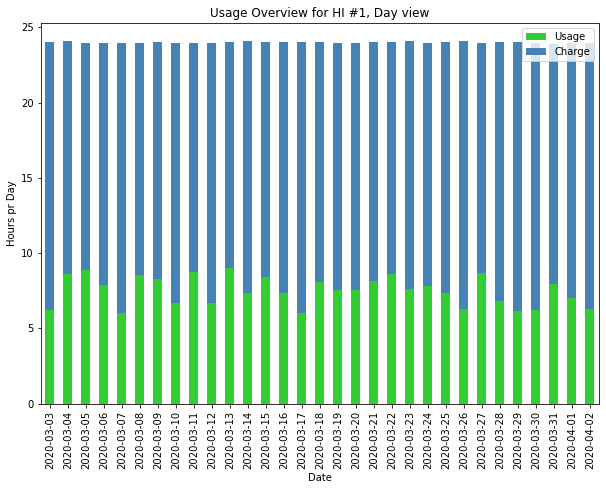

In [12]:
# Plot Usage Overview pr Day
user_id = 1
ax = dd[dd['id'] == 0].iloc[0:31].plot.bar(x='date', y=['Usage', 'Charge'],
         stacked=True, color=['limegreen', 'steelblue'],
         title='Usage Overview for HI #' + str(user_id)
         + ', Day view')
ax.legend(loc="upper right")
ax.set_xlabel('Date')
ax.set_ylabel('Hours pr Day')

Text(0, 0.5, 'Percentage (%)')

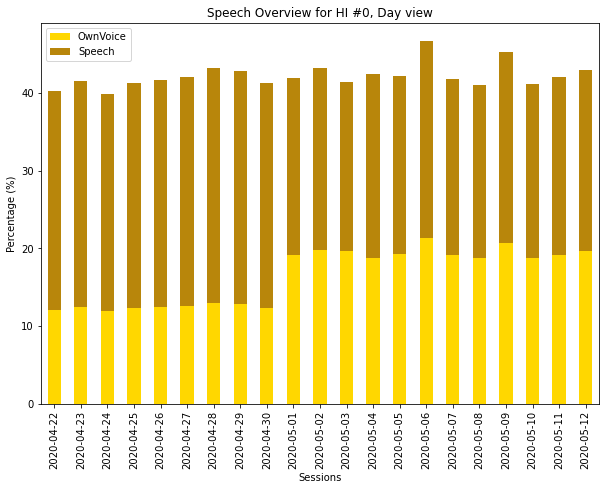

In [18]:
# Plot Own voice and speech data
user_id = 0
ax = dd[dd['id'] == user_id].iloc[50:71].plot.bar(x='date', y=['OwnVoice', 'Speech'],
                                      stacked=True,
                                      color=['gold', 'darkgoldenrod'],
                                      title='Speech Overview for HI #' + str(user_id)
                                      + ', Day view')
ax.set_xlabel('Sessions')
ax.set_ylabel('Percentage (%)')

In [14]:
# Create DataFrame for holding features
da = pd.DataFrame(data=sorted(df['id'].unique()),
                  columns=['user_id'])

# Prepare features
features = ['usage-pr-day', 'ovd-inc', 'speech-inc', 'ovd-snr-low-inc']
zeros = np.zeros((len(da), len(features)))
da = da.join(pd.DataFrame(data=zeros, columns=features))
da.set_index('user_id', inplace=True)
# print(da)

# Extract features for each client
secPyear = 365 * 3600
for i, row in da.iterrows():
    di = df.loc[df['id'] == i]
    row['usage-pr-day'] = di.iloc[-1]['usage'] / secPyear
    # row['charge'] = di.iloc[-1]['charge'] / secPyear
    row['ovd-inc'] = (di.iloc[-1]['ovd'] - di.iloc[0]['ovd']) / secPyear
    row['speech-inc'] = (di.iloc[-1]['speech'] - di.iloc[0]['speech'])\
        / secPyear
    row['ovd-snr-low-inc'] = (di.iloc[-1]['ovd-snr-low']
                              - di.iloc[0]['ovd-snr-low']) / secPyear
# Let's see the stuff
da

,usage-pr-day,ovd-inc,speech-inc,ovd-snr-low-inc
user_id,,,,
0,7.641415,1.590078,1.605171,0.236685
1,7.658746,1.555643,1.266116,0.332967
2,7.662906,1.606601,2.053021,0.159151
3,7.668420,1.615346,1.518620,0.291556
4,7.604893,1.401503,2.134555,0.270189
5,7.603613,1.514727,1.457489,0.230309
6,7.633395,1.365358,2.667367,0.226279
7,7.607689,1.466540,1.919908,0.315288
8,6.009731,0.824316,0.686799,0.254785


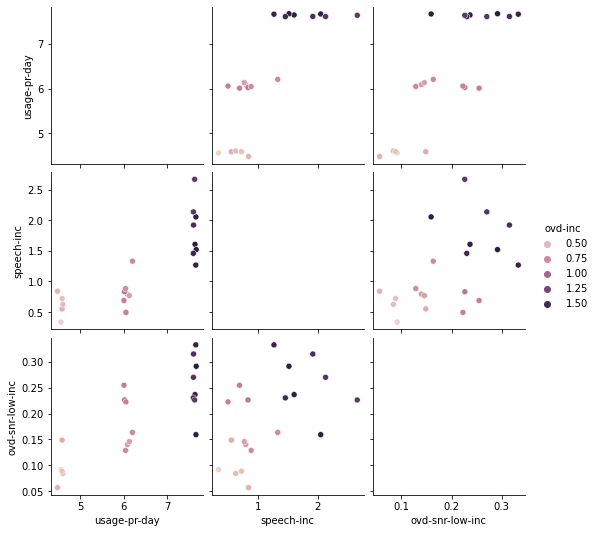

In [15]:
# Create pairplot to analyze correlations
sns.color_palette("tab10")
sns.pairplot(da, hue="ovd-inc")